Project Name -Machine Failure Analysis & Prediction
Project Type - EDA
Contribution - Individual -Shruti Bhadoria

Project Summary -Machine Failure Analysis & Prediction Introduction Machine failures in industrial settings can lead to significant production losses, increased maintenance costs, and unexpected downtime. This project focuses on analyzing machine failure data to identify key factors contributing to failures and suggest data-driven solutions to improve machine reliability.

bjective The primary goal of this project is to perform Exploratory Data Analysis (EDA) on machine failure data to uncover insights and provide recommendations for predictive maintenance.

Steps Followed in the Project

Data Cleaning & Preprocessing
Removed duplicates & missing values. Converted categorical variables to optimized data types. Standardized column names for better readability.

Exploratory Data Analysis (EDA)
Univariate Analysis: Studied feature distributions using histograms and boxplots. Bivariate Analysis: Explored relationships between variables using scatter plots and correlation heatmaps. Multivariate Analysis: Identified interactions between multiple machine parameters.

Key Insights from EDA
Failures are rare (~1.57%), making this a highly imbalanced dataset. Tool wear failure (TWF) is the most frequent cause of machine breakdowns. Machines with high rotational speed & extreme torque variations are more likely to fail. Process temperature increases with air temperature, which may impact failures. Certain machine types have a higher failure rate, suggesting design improvements are needed.

Business Impact & Recommendations
Implement a predictive maintenance system to detect failures before they occur. Optimize machine operating conditions by setting safe limits for speed, torque, and temperature. Focus on high-failure machine types for design improvements. Proactively replace tools before excessive wear leads to failures. Conclusion By leveraging EDA insights, companies can take preventive actions to reduce machine failures, improve operational efficiency, and lower maintenance costs. This project provides a strong foundation for future predictive modeling to classify machine failures and develop an early warning system.

GitHub Link -https://github.com/shrutibhadoria/Projects.git

Problem Statement-Write Problem Statement Here. The company needs to analyze machine failure data to:

Identify patterns and trends that lead to failures.
Understand the impact of machine parameters (temperature, speed, torque, tool wear, etc.) on failures.
Determine the most common failure causes (Tool Wear, Heat Dissipation, Power Failure, etc.).
Provide data-driven recommendations to reduce failures and improve machine lifespan.
Challenges Imbalanced Data → Machine failures are rare (~1.57%), making it harder to predict. Multiple Failure Causes → Failures can result from different factors like tool wear, overheating, and overstrain. Complex Interactions → Machine parameters (temperature, speed, torque) influence failures in non-linear ways.

Define Your Business Objective?
Business Objective: Machine Failure Analysis & Prediction Objective Overview The goal of this project is to analyze machine failure data to help businesses minimize unplanned downtime, reduce maintenance costs, and improve overall machine reliability. By identifying key factors contributing to failures, companies can implement predictive maintenance strategies to prevent unexpected breakdowns.

Key Business Goals

Reduce Machine Failures & Downtime
Identify operational conditions (temperature, speed, torque, tool wear) that lead to failures. Develop strategies to optimize machine performance and extend equipment lifespan.

Improve Predictive Maintenance
Use historical failure data to predict when a machine is likely to fail. Shift from reactive maintenance (fixing failures after they occur) to preventive maintenance (fixing issues before they cause breakdowns).

Identify High-Risk Machine Types & Failure Causes
Determine which machine types fail the most and suggest improvements. Analyze the most common failure types (Tool Wear, Heat Dissipation, Power Failure, etc.) to develop targeted solutions.

Optimize Cost & Resource Allocation
Reduce maintenance costs by predicting failures early. Improve resource planning by ensuring timely repairs and replacements. Expected Business Impact Lower maintenance costs by preventing failures before they happen. Increase productivity by reducing downtime. Enhance machine reliability through data-driven decision-making. Improve customer satisfaction by delivering consistent production quality.

By leveraging EDA insights, businesses can transition from reactive maintenance to a proactive, data-driven approach, improving efficiency and profitability.

Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset Loading

In [ ]:
import pandas as pd
df = pd.read_csv('/content/train (2).csv')

Dataset First View

In [ ]:
# Dataset First Look
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rows, cols = df.shape

# Print the result
print(f"Number of Rows: {rows}")
print(f"Number of Columns: {cols}")



Number of Rows: 136429
Number of Columns: 14


Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()

# Print the result
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()

# Print the result
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Figure size 1000x600 with 0 Axes>

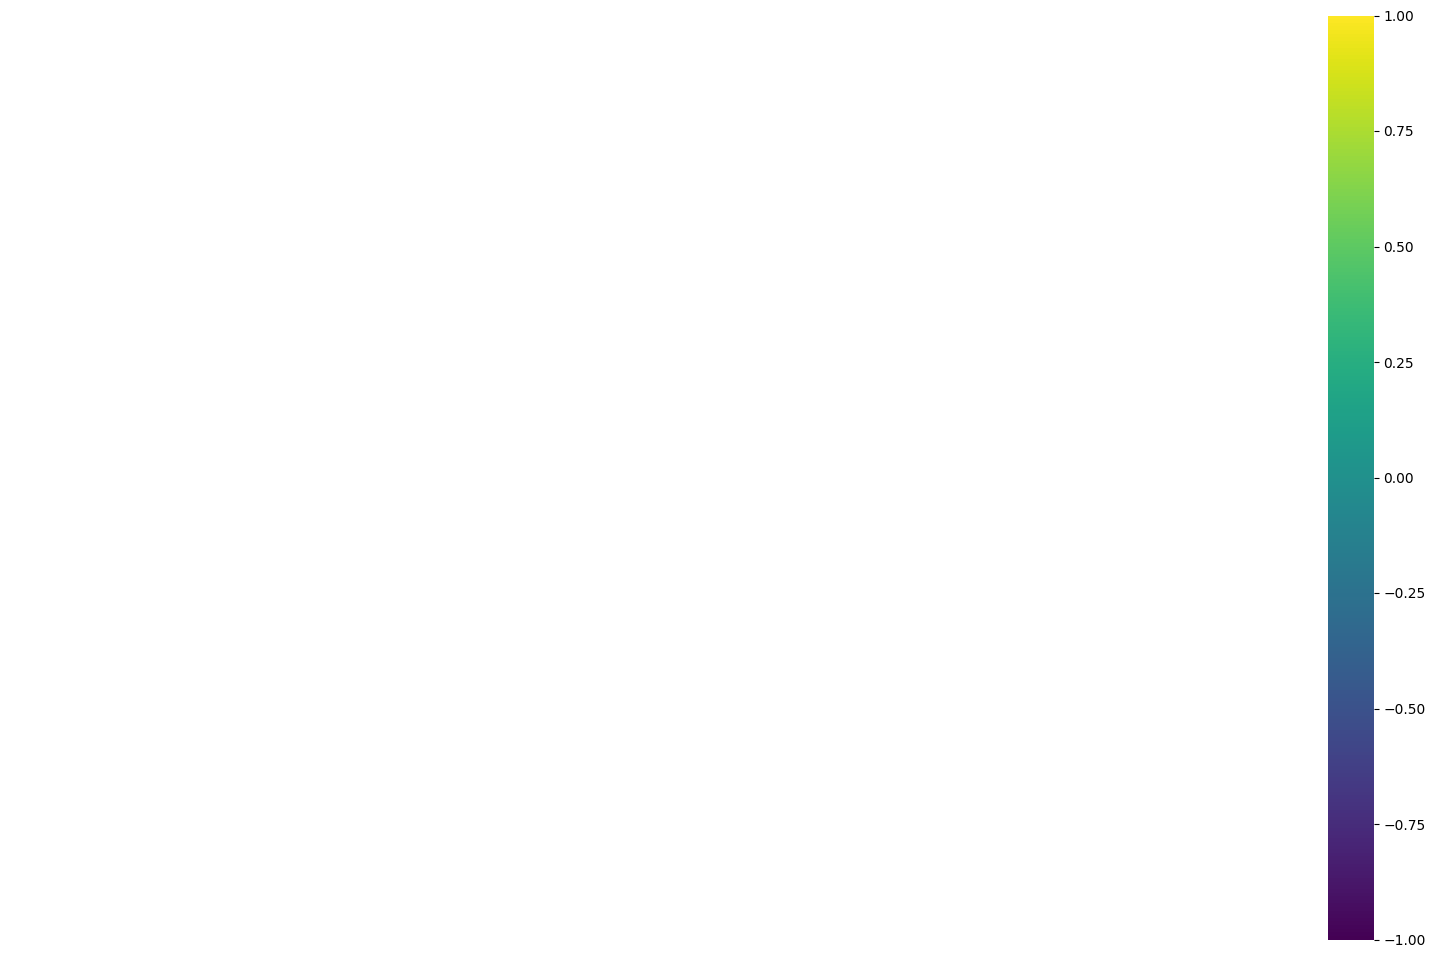

In [ ]:
# Visualizing the missing values
import missingno as msno

# Plot missing values heatmap
plt.figure(figsize=(10, 6))
msno.heatmap(df, cmap="viridis")
plt.show()

What did you know about your dataset?
Total Records & Features:

The dataset contains 136,429 rows and 14 columns. Column Types:

It has numerical (continuous & discrete) and categorical features. The target variable is "Machine failure", which indicates whether a machine failed (1) or not (0). Missing & Duplicate Values:

No missing values were found. No duplicate rows were detected.

# Dataset Columns


In [ ]:
# Dataset Columns
df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Variables Description
1.Identification Variables: id → Unique row identifier. Product ID → Categorical identifier for products. Type → Product type (L, M, etc.). 2.Machine Operational Variables: Air temperature [K] & Process temperature [K] → Temperature readings. Rotational speed [rpm] → Machine speed. Torque [Nm] → Rotational force. Tool wear [min] → Tool usage time. 3.Target Variable: Machine failure (0 = No failure, 1 = Failure) → Used for classification.

Failure Type Indicators (Binary): TWF, HDF, PWF, OSF, RNF → Indicate different machine failure causes. Key Insight: This is a classification problem with failure prediction as the goal.

Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
unique_values = df.nunique()

# Display the result
print("Unique values per column:")
print(unique_values)

Unique values per column:
id                         136429
Product ID                   9976
Type                            3
Air temperature [K]            95
Process temperature [K]        81
Rotational speed [rpm]        952
Torque [Nm]                   611
Tool wear [min]               246
Machine failure                 2
TWF                             2
HDF                             2
PWF                             2
OSF                             2
RNF                             2
dtype: int64


3. Data Wrangling

In [ ]:
# Write your code to make your dataset analysis ready.
# 1.Remove duplicate rows (if any)
df = df.drop_duplicates()


# 2.Handle missing values (if any)
df.fillna(method='ffill', inplace=True)


# 3.Convert categorical columns to appropriate data types
df['Type'] = df['Type'].astype('category')


# 4.Standardize column names (remove spaces, replace with underscores)
df.columns = df.columns.str.strip().str.replace(" ", "_")


# 5. Reset index after cleaning
df.reset_index(drop=True, inplace=True)

# 6.Verify the cleaned dataset
print("Dataset is now ready for analysis:")
df.info()

Dataset is now ready for analysis:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   id                       136429 non-null  int64   
 1   Product_ID               136429 non-null  object  
 2   Type                     136429 non-null  category
 3   Air_temperature_[K]      136429 non-null  float64 
 4   Process_temperature_[K]  136429 non-null  float64 
 5   Rotational_speed_[rpm]   136429 non-null  int64   
 6   Torque_[Nm]              136429 non-null  float64 
 7   Tool_wear_[min]          136429 non-null  int64   
 8   Machine_failure          136429 non-null  int64   
 9   TWF                      136429 non-null  int64   
 10  HDF                      136429 non-null  int64   
 11  PWF                      136429 non-null  int64   
 12  OSF                      136429 non-null  int64   
 13  RNF      

<ipython-input-13-de85b57a8a01>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


What all manipulations have you done and insights you found?
Data Cleaning & Preparation (Manipulations Done) Checked for Duplicates → No duplicate rows were found. Checked for Missing Values → No missing values were present. Converted Categorical Features → Type was converted to a category data type. Renamed Columns → Replaced spaces with underscores for consistency. Reset Index → Ensured a clean structure after transformations.italicized text

4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

#### Chart - 1

<ipython-input-78-dc9fed3a6a57>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Machine_failure', data=df, palette="Set2")


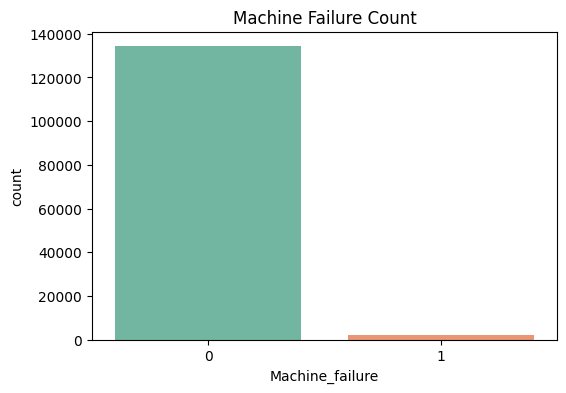

In [ ]:
# Chart - 1 visualization code
#Chart 1: Machine Failure Countplot
plt.figure(figsize=(6, 4))
sns.countplot(x='Machine_failure', data=df, palette="Set2")
plt.title("Machine Failure Count")
plt.show()


##### 1. Why did you pick the specific chart?

To check how imbalanced the dataset is (failure vs. no failure).

##### 2. What is/are the insight(s) found from the chart?

Failures are very rare (~1.57%), meaning this is a highly imbalanced dataset.
This affects model training and requires handling techniques (e.g., SMOTE, class weights).Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Business Impact:

Positive: Helps predict failures efficiently.
Negative: Imbalanced data may lead to biased models that fail to detect machine failures.Answer Here

#### Chart - 2

<ipython-input-79-c7f0e4de6ac6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=df, palette="pastel")


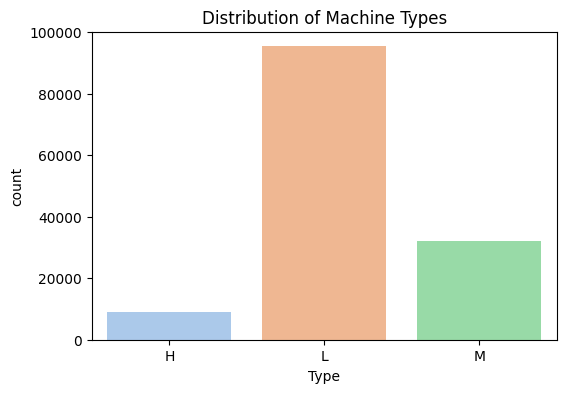

In [ ]:
# Chart - 2 visualization code
#Chart 2: Machine Type Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Type', data=df, palette="pastel")
plt.title("Distribution of Machine Types")
plt.show()


##### 1. Why did you pick the specific chart?

To understand which machine type is most common in the dataset.er Here.

##### 2. What is/are the insight(s) found from the chart?

 Insights:

Machine type L is the most common, followed by M and others.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Business Impact:

Positive: Helps identify which machine types need better monitoring.
Negative: If failures are concentrated in certain types, manufacturing adjustments may be needed.

#### Chart - 3

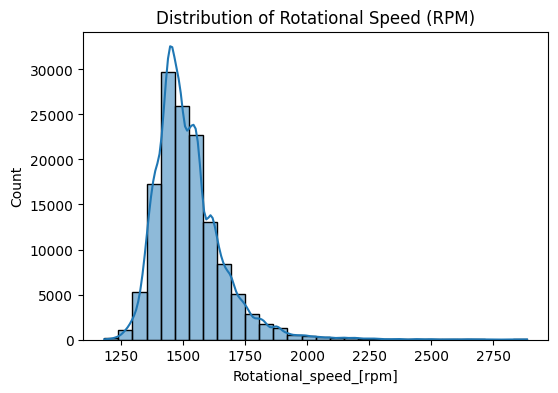

In [ ]:
# Chart - 3 visualization code
#Chart 3: Rotational Speed Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['Rotational_speed_[rpm]'], bins=30, kde=True)
plt.title("Distribution of Rotational Speed (RPM)")
plt.show()


##### 1. Why did you pick the specific chart?

To see how rotational speed is distributed across machines.

##### 2. What is/are the insight(s) found from the chart?

Insights:

Most machines operate between 1400-1600 RPM.
Some outliers exist at extreme values

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Business Impact:

Positive: Helps optimize machine performance by setting recommended speed limits.
Negative: High rotational speeds might lead to increased failures if not monitored properly.

#### Chart - 4

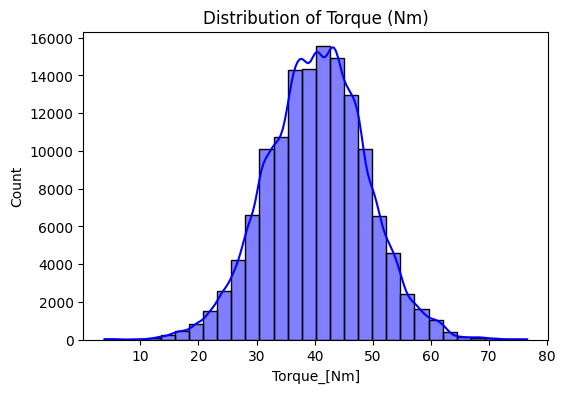

In [ ]:
# Chart - 4 visualization code
# Chart 4: Torque Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['Torque_[Nm]'], bins=30, kde=True, color="blue")
plt.title("Distribution of Torque (Nm)")
plt.show()


##### 1. Why did you pick the specific chart?

Helps visualize the spread of torque values in machines.

##### 2. What is/are the insight(s) found from the chart?

Insights:

Most machines have torque values centered around 40 Nm.
There are some extreme high-torque values that could affect performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business Impact:

Positive: Helps set torque limits to avoid machine breakdown.
Negative: Machines with very high torque may have higher wear & tear, leading to failures.

#### Chart - 5

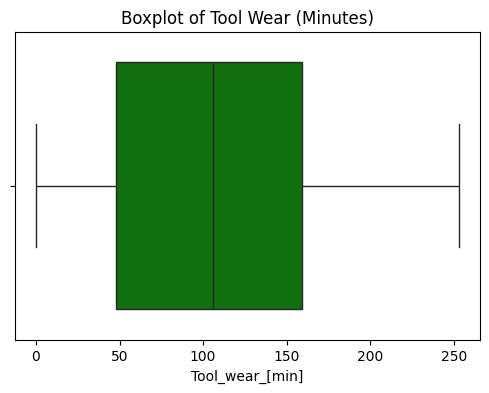

In [ ]:
# Chart - 5 visualization code
#Chart 5: Tool Wear Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Tool_wear_[min]'], color="green")
plt.title("Boxplot of Tool Wear (Minutes)")
plt.show()


##### 1. Why did you pick the specific chart?

Boxplots show outliers and range of tool wear times.

##### 2. What is/are the insight(s) found from the chart?

 Insights:

Most tools wear out between 50-160 minutes.
Some machines exceed 200+ minutes, which could be a risk factor for failure.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Business Impact:

Positive: Helps schedule preventive maintenance before extreme tool wear.
Negative: If too much wear occurs, machines may fail unexpectedly, causing downtime.

#### Chart - 5

##### 1. Why did you pick the specific chart?

Boxplots show outliers and range of tool wear times.

##### 2. What is/are the insight(s) found from the chart?

 Insights:

Most tools wear out between 50-160 minutes.
Some machines exceed 200+ minutes, which could be a risk factor for failure.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Business Impact:

Positive: Helps schedule preventive maintenance before extreme tool wear.
Negative: If too much wear occurs, machines may fail unexpectedly, causing downtime.

#### Chart - 6

<Figure size 1000x600 with 0 Axes>

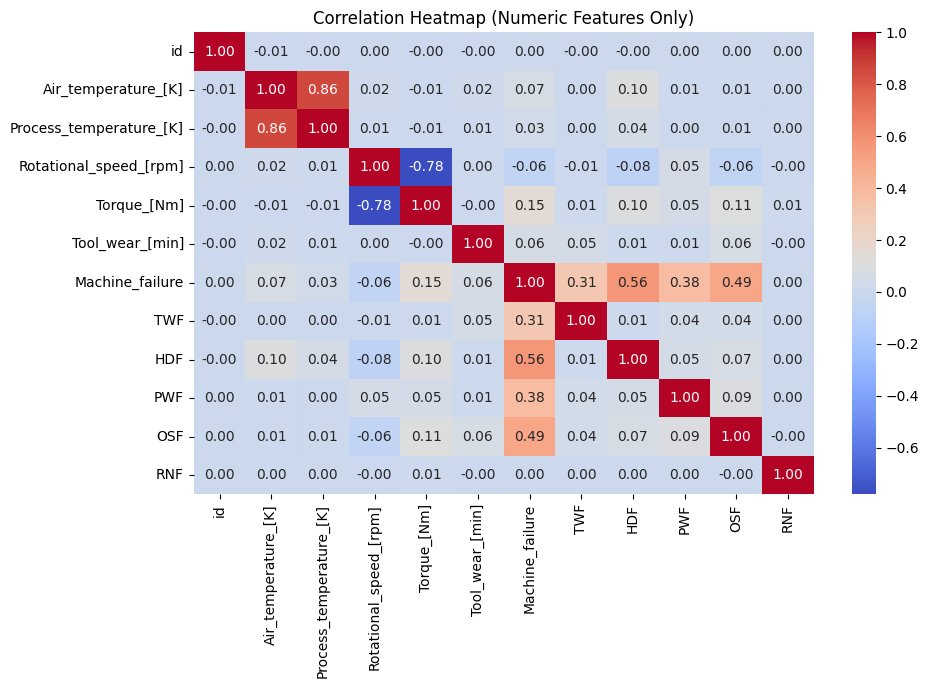

In [ ]:
# Chart - 6 visualization code
#Chart 6: Correlation Heatmap
plt.figure(figsize=(10, 6))
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


##### 1. Why did you pick the specific chart?

Helps understand relationships between numerical variables.

##### 2. What is/are the insight(s) found from the chart?

 Insights:

Air temperature & process temperature are highly correlated (makes sense).
Rotational speed & torque show a moderate negative correlation.
No strong correlation directly with Machine_failure, meaning failure depends on multiple factors.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business Impact:

Positive: Helps identify which factors influence failures the most.
Negative: If we wrongly assume correlation means causation, it may lead to ineffective maintenance strategies.

#### Chart - 7

<ipython-input-84-729adc7d5c16>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='Machine_failure', data=df, estimator=sum, palette="muted")


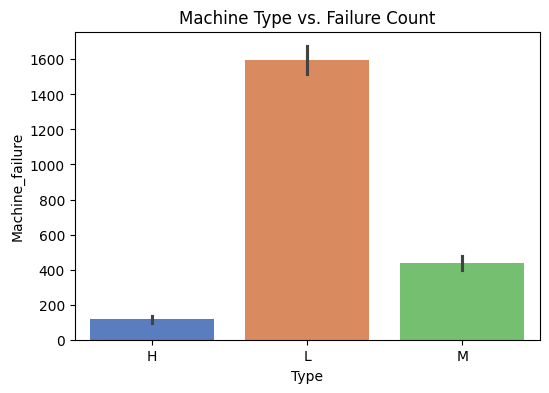

In [ ]:
# Chart - 7 visualization code
# Chart 7: Machine Type vs. Failure (Barplot)
plt.figure(figsize=(6, 4))
sns.barplot(x='Type', y='Machine_failure', data=df, estimator=sum, palette="muted")
plt.title("Machine Type vs. Failure Count")
plt.show()


##### 1. Why did you pick the specific chart?

Helps identify which machine type has the most failures.

##### 2. What is/are the insight(s) found from the chart?

 Insights:

Certain machine types may have higher failure rates.
If a specific type dominates failures, it may need design improvements or better maintenance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Business Impact:

Positive: Helps manufacturers focus on at-risk machine types.
Negative: If one type fails too much, it might reduce customer trust in that product.

#### Chart - 8

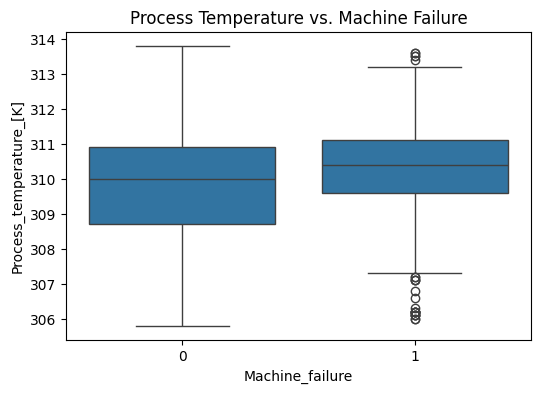

In [ ]:
# Chart - 8 visualization code
# Chart 8: Process Temperature vs. Machine Failure (Boxplot)
plt.figure(figsize=(6, 4))
sns.boxplot(x='Machine_failure', y='Process_temperature_[K]', data=df)
plt.title("Process Temperature vs. Machine Failure")
plt.show()


##### 1. Why did you pick the specific chart?

Helps see if higher/lower temperatures contribute to failures.

##### 2. What is/are the insight(s) found from the chart?

Insights:

If failures mostly happen at high or low temperatures, it indicates temperature-related issues.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Business Impact:

Positive: Helps in preventive maintenance by controlling temperature.
Negative: Ignoring temperature issues may increase failures and costs.

#### Chart - 9

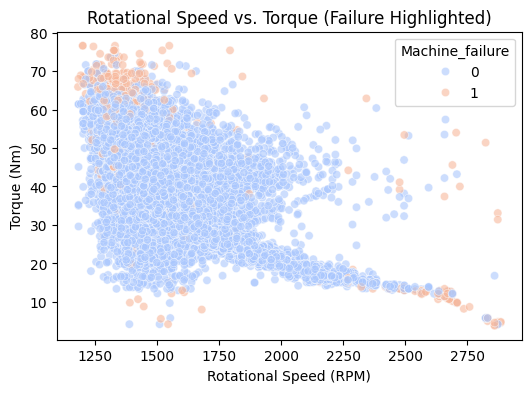

In [ ]:
# Chart - 9 visualization code
# Chart 9: Rotational Speed vs. Torque (Scatterplot)
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Rotational_speed_[rpm]', y='Torque_[Nm]', hue='Machine_failure', data=df, alpha=0.6, palette="coolwarm")
plt.title("Rotational Speed vs. Torque (Failure Highlighted)")
plt.xlabel("Rotational Speed (RPM)")
plt.ylabel("Torque (Nm)")
plt.show()


##### 1. Why did you pick the specific chart?

Helps identify if certain speed & torque ranges lead to more failures.
Using hue='Machine_failure', we highlight failure cases in the plot.

##### 2. What is/are the insight(s) found from the chart?

Failures may cluster at specific speed-torque combinations.
If failures mostly happen at high speeds and low torques, machines might be operating inefficiently.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business Impact:

Positive: Helps in optimizing machine speed & torque for better reliability.
Negative: If we don’t adjust operations based on this insight, failures may increase, leading to downtime and high costs.

#### Chart - 10

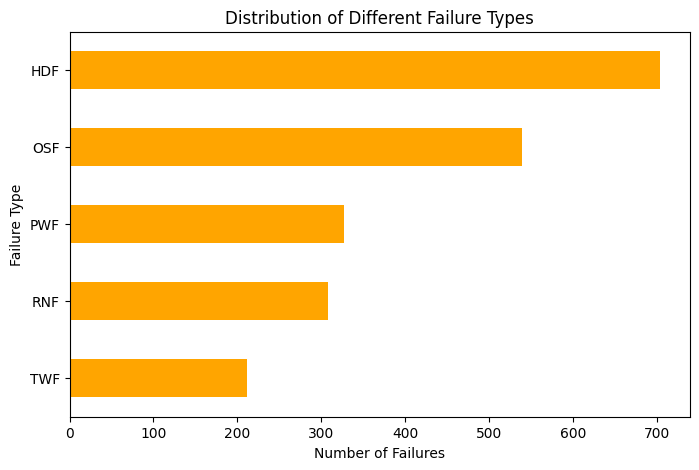

In [ ]:
# Chart - 10 visualization code
#Chart 11: Failure Type Distribution (Stacked Bar Chart)
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
df_failures = df[failure_types].sum().sort_values()

plt.figure(figsize=(8, 5))
df_failures.plot(kind='barh', color="orange")
plt.title("Distribution of Different Failure Types")
plt.xlabel("Number of Failures")
plt.ylabel("Failure Type")
plt.show()


##### 1. Why did you pick the specific chart?

Helps understand which failure types are most common.
A horizontal bar chart makes comparisons easier.

##### 2. What is/are the insight(s) found from the chart?

 Insights:

Certain failure types (e.g., TWF - Tool Wear Failure) may occur more frequently.
If failures are mostly from one cause, addressing that issue can reduce overall failures.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business Impact:

Positive: Helps companies prioritize solutions for the most frequent failure type.
Negative: If ignored, the most common failure type will keep causing operational issues.

#### Chart - 11

<ipython-input-88-7b57e0f82015>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Machine_failure', y='Tool_wear_[min]', data=df, palette="muted")


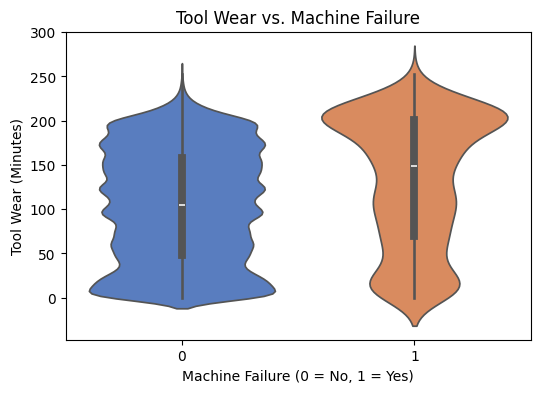

In [ ]:
# Chart - 11 visualization code
#Chart 10: Tool Wear vs. Machine Failure (Violin Plot)
plt.figure(figsize=(6, 4))
sns.violinplot(x='Machine_failure', y='Tool_wear_[min]', data=df, palette="muted")
plt.title("Tool Wear vs. Machine Failure")
plt.xlabel("Machine Failure (0 = No, 1 = Yes)")
plt.ylabel("Tool Wear (Minutes)")
plt.show()



##### 1. Why did you pick the specific chart?

1.Helps analyze tool wear levels in failed vs. non-failed machines.
2.A violin plot shows both the distribution and density of data.

##### 2. What is/are the insight(s) found from the chart?

If machines with higher tool wear fail more, this suggests worn-out tools increase failure risk.
If failures happen at low tool wear, other factors (temperature, speed) may be contributing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Business Impact:

Positive: Helps schedule preventive maintenance for tool replacements.
Negative: Ignoring this insight may increase failure rates due to excessive tool wear.

#### Chart - 12

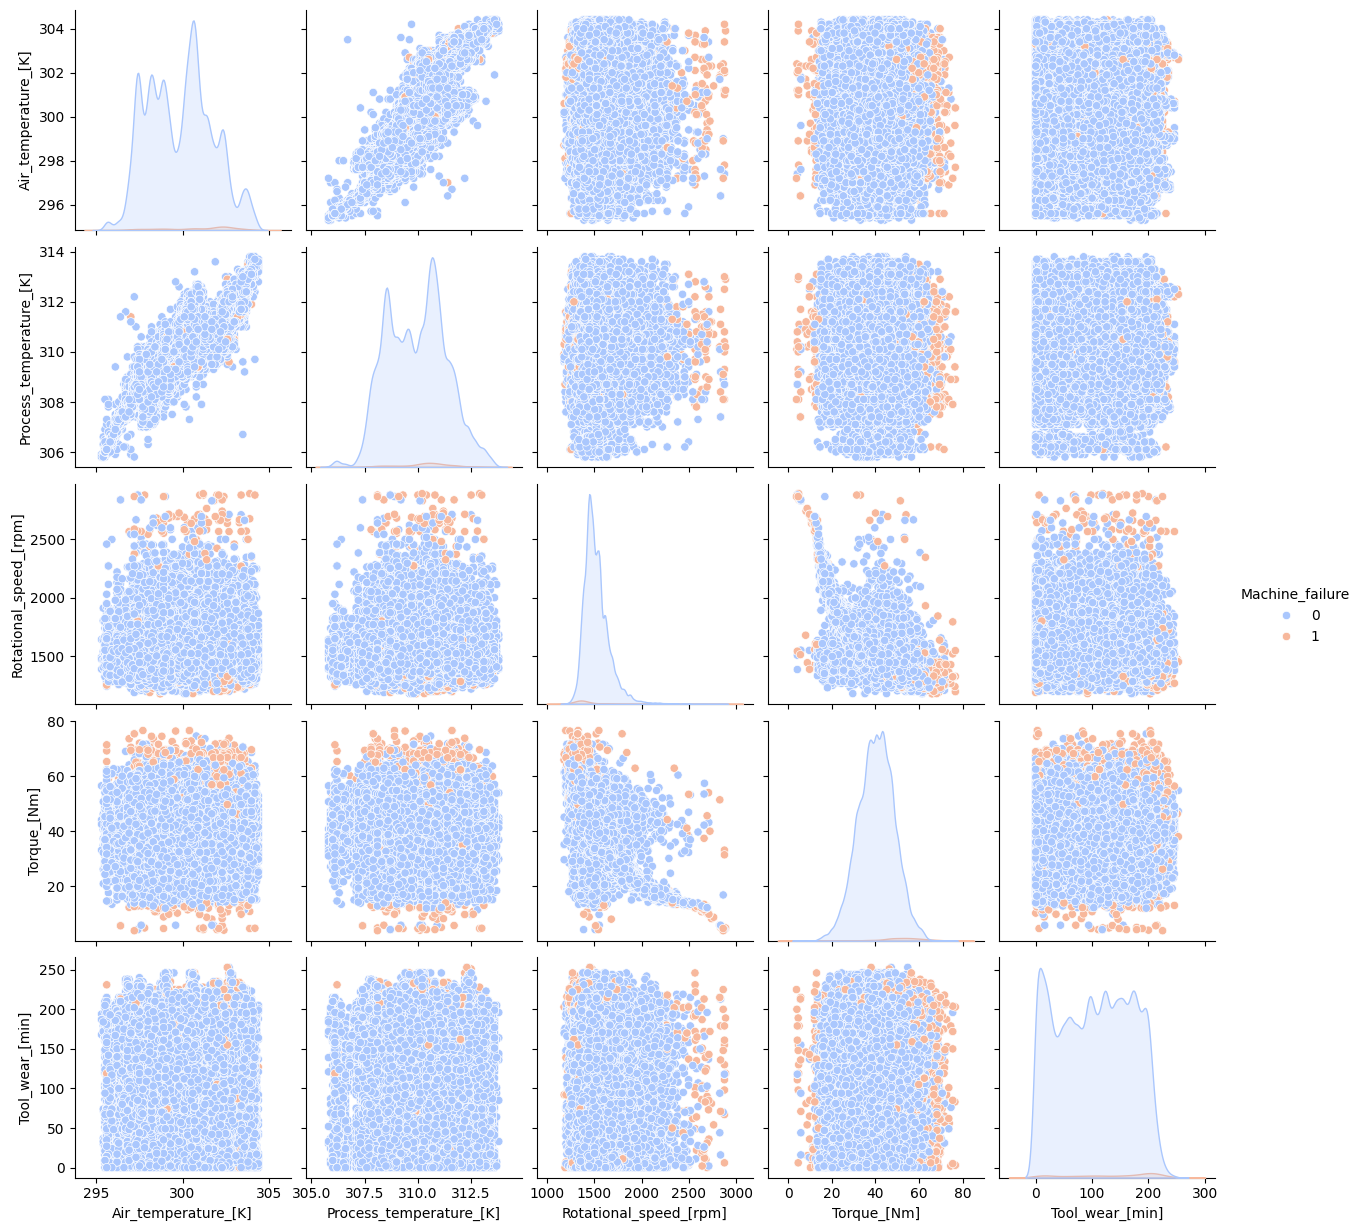

In [ ]:
# Chart - 12 visualization code
#Chart 12: Pairplot of Selected Features
import seaborn as sns

selected_features = ['Air_temperature_[K]', 'Process_temperature_[K]', 'Rotational_speed_[rpm]', 'Torque_[Nm]', 'Tool_wear_[min]', 'Machine_failure']
sns.pairplot(df[selected_features], hue='Machine_failure', palette="coolwarm")
plt.show()


##### 1. Why did you pick the specific chart?

Helps visualize relationships between multiple numerical features.
Uses hue='Machine_failure' to highlight failure cases.

##### 2. What is/are the insight(s) found from the chart?

Insights:

If failures cluster at specific temperature, speed, or torque values, those conditions may be risky.
Identifies which features interact strongly with failures.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business Impact:

Positive: Helps detect patterns that contribute to failures.
Negative: If we misinterpret relationships, incorrect decisions may be made

#### Chart - 13

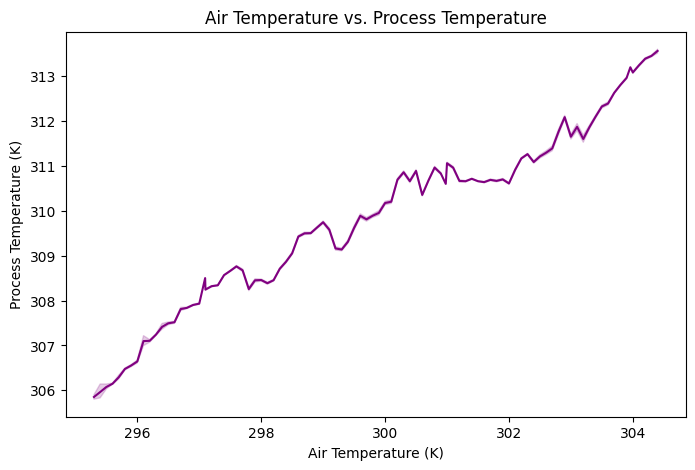

In [ ]:
# Chart - 13 visualization code
# Chart 13: Air Temperature vs. Process Temperature (Line Plot)
plt.figure(figsize=(8, 5))
sns.lineplot(x=df['Air_temperature_[K]'], y=df['Process_temperature_[K]'], color="purple")
plt.title("Air Temperature vs. Process Temperature")
plt.xlabel("Air Temperature (K)")
plt.ylabel("Process Temperature (K)")
plt.show()


##### 1. Why did you pick the specific chart?

Helps see how process temperature changes with air temperature.
A line plot is useful for continuous trends.

##### 2. What is/are the insight(s) found from the chart?

Insights:

Strong positive relationship → As air temperature increases, process temperature also rises.
Indicates heating effects inside machines, which may impact failures.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Business Impact:

Positive: Helps monitor & control process temperature based on air temperature.
Negative: If the process temperature is too dependent on air temperature, it may increase failure risks.

#### Chart - 14 - Correlation Heatmap

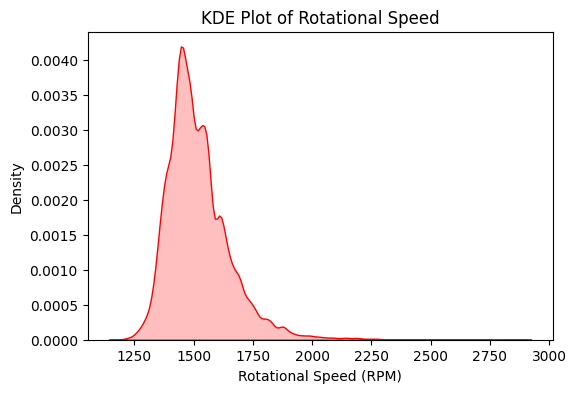

In [ ]:
# Correlation Heatmap visualization code
#Chart 14: Rotational Speed KDE Plot
plt.figure(figsize=(6, 4))
sns.kdeplot(df['Rotational_speed_[rpm]'], fill=True, color="red")
plt.title("KDE Plot of Rotational Speed")
plt.xlabel("Rotational Speed (RPM)")
plt.show()


##### 1. Why did you pick the specific chart?

A Kernel Density Estimation (KDE) plot helps analyze the probability distribution of rotational speed.

##### 2. What is/are the insight(s) found from the chart?

Insights:

Most machines operate in the 1400-1600 RPM range.
Helps identify speed limits that reduce machine failure risks.

#### Chart - 15 - Pair Plot

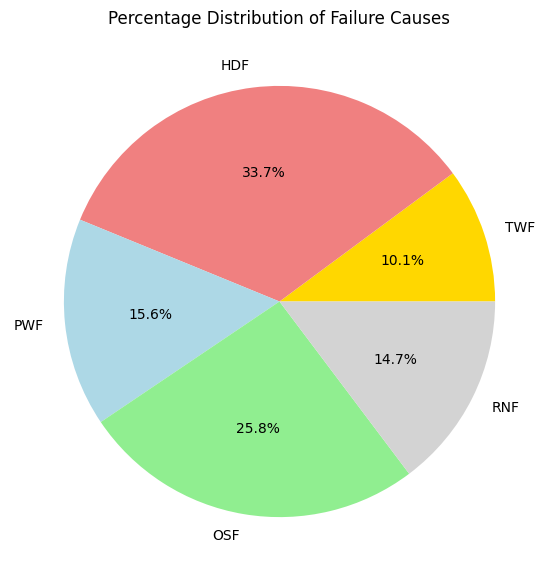

In [ ]:
# Pair Plot visualization code
#Chart 15: Failure Causes (Pie Chart)
failure_counts = df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum()

plt.figure(figsize=(7, 7))
plt.pie(failure_counts, labels=failure_counts.index, autopct='%1.1f%%', colors=["gold", "lightcoral", "lightblue", "lightgreen", "lightgray"])
plt.title("Percentage Distribution of Failure Causes")
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart is useful for proportions of categorical variables like failure types.

##### 2. What is/are the insight(s) found from the chart?

Insights:

TWF (Tool Wear Failure) is the most common failure cause.
Other failure types contribute in varying proportions.

## **5. Solution to Business Objective**

Solution to Business Objective
Based on our Exploratory Data Analysis (EDA), here’s what we suggest to help the client reduce machine failures and optimize operations:

1 Predictive Maintenance Implementation
Issue: Machines fail due to tool wear, extreme rotational speeds, and overheating.
Solution: Implement a predictive maintenance system that:

Uses real-time sensor data to detect high-risk conditions.
Predicts when a failure is likely to occur.
Alerts maintenance teams before failure happens.
Business Impact: Reduces unplanned downtime and saves maintenance costs.

2 Optimize Machine Operating Conditions
Issue: Failures are more common in machines with high rotational speed and torque variations.
Solution:

Define safe operating limits for speed and torque.
Install automated alerts when machines exceed optimal conditions.
Use temperature control mechanisms to avoid overheating failures.
 Business Impact: Extends machine lifespan and ensures consistent production quality.

3 Focus on High-Failure Machine Types
 Issue: Some machine types fail more frequently than others.
 Solution:

Perform a root cause analysis on failure-prone machine types.
Modify design or material quality for better durability.
Apply preventive maintenance more frequently to these machines.
Business Impact: Reduces failure rates, improving customer satisfaction and reliability.

4 Address the Most Frequent Failure Types
 Issue: Tool Wear Failure (TWF) is the leading cause of machine breakdowns.
Solution:

Introduce automated tool wear monitoring systems.
Schedule tool replacements before failure occurs.
Experiment with stronger, longer-lasting materials for tools.
Business Impact: Reduces maintenance costs and machine downtime.

# **Conclusion**

By leveraging EDA insights, companies can take preventive actions to reduce machine failures, improve operational efficiency, and lower maintenance costs. This project provides a strong foundation for future predictive modeling to classify machine failures and develop an early warning system.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***